# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
# dataDir = "E:/AV/DataSetExploration/drone-dataset-tools/data/location-2/home"
dataDir = "D:/AV/DataSetExploration/jaywalker"

In [2]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\TTI-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [5]:
allDf = pd.read_csv(os.path.join(dataDir, f"2022-12-30-00-00-tracks-soft.csv"))
pedDf = allDf[allDf['class'] == 'pedestrian'].copy()

In [6]:
pedDf.head()

,frame,mapX,mapY,recordingId,trackId,class
0,1,-113.0,-3.0,1,986,pedestrian
1,2,-113.0,-3.0,1,986,pedestrian
2,3,-113.0,-3.0,1,986,pedestrian
3,4,-113.0,-3.0,1,986,pedestrian
4,5,-113.0,-3.0,1,986,pedestrian


In [7]:
minYDisplacement = 3
maxXDisplacement = 6

visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='trackId', 
        xCol='mapX', 
        yCol='mapY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed',
        fps = 25.0
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)

In [8]:
transformer.deriveAxisVelocities(pedDf)
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
pedDf.describe()

,frame,mapX,mapY,recordingId,trackId,sceneXVelocity,sceneYVelocity,speed,displacementX,displacementY
count,35331.000000,35331.000000,35331.000000,35331.000000,35331.000000,35331.000000,35331.000000,35331.000000,35331.000000,35331.000000
mean,87.227421,-114.284970,-7.034032,102.771872,1494.859359,0.445939,1.577474,1.788866,1.616070,4.034032
std,50.423755,2.043765,3.269995,58.983526,294.917629,1.475399,2.586134,2.890004,1.793436,3.269995
min,1.000000,-122.754707,-14.859595,1.000000,986.000000,-24.274254,0.000000,0.000000,0.000000,0.000000
25%,44.000000,-115.436832,-9.806403,52.000000,1241.000000,-0.000763,1.300883,1.596539,0.121960,0.737548
50%,87.000000,-113.584435,-6.775812,103.000000,1496.000000,0.346565,1.660573,1.987575,0.984756,3.775812
75%,130.000000,-113.000000,-3.737548,154.000000,1751.000000,1.069260,1.899600,2.006171,2.541130,6.806403
max,224.000000,-108.658356,-3.000000,205.000000,2006.000000,29.646301,38.425493,38.479257,9.754707,11.859595


In [9]:
pedDf.describe()

,frame,mapX,mapY,recordingId,trackId,sceneXVelocity,sceneYVelocity,speed,displacementX,displacementY
count,35331.000000,35331.000000,35331.000000,35331.000000,35331.000000,35331.000000,35331.000000,35331.000000,35331.000000,35331.000000
mean,87.227421,-114.284970,-7.034032,102.771872,1494.859359,0.445939,1.577474,1.788866,1.616070,4.034032
std,50.423755,2.043765,3.269995,58.983526,294.917629,1.475399,2.586134,2.890004,1.793436,3.269995
min,1.000000,-122.754707,-14.859595,1.000000,986.000000,-24.274254,0.000000,0.000000,0.000000,0.000000
25%,44.000000,-115.436832,-9.806403,52.000000,1241.000000,-0.000763,1.300883,1.596539,0.121960,0.737548
50%,87.000000,-113.584435,-6.775812,103.000000,1496.000000,0.346565,1.660573,1.987575,0.984756,3.775812
75%,130.000000,-113.000000,-3.737548,154.000000,1751.000000,1.069260,1.899600,2.006171,2.541130,6.806403
max,224.000000,-108.658356,-3.000000,205.000000,2006.000000,29.646301,38.425493,38.479257,9.754707,11.859595


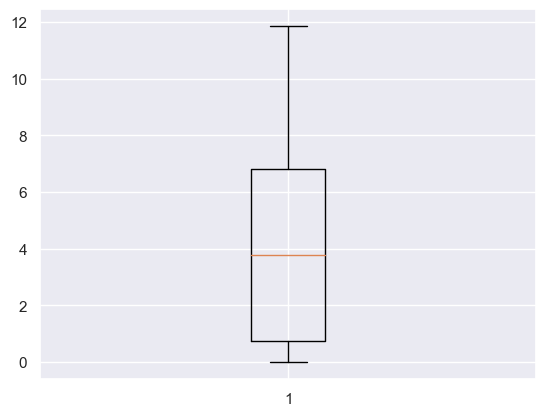

{'whiskers': [<matplotlib.lines.Line2D at 0x217951f9430>,
 'caps': [<matplotlib.lines.Line2D at 0x2179521bee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21795201850>],
 'medians': [<matplotlib.lines.Line2D at 0x217951ff4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2179521b670>],
 'means': []}

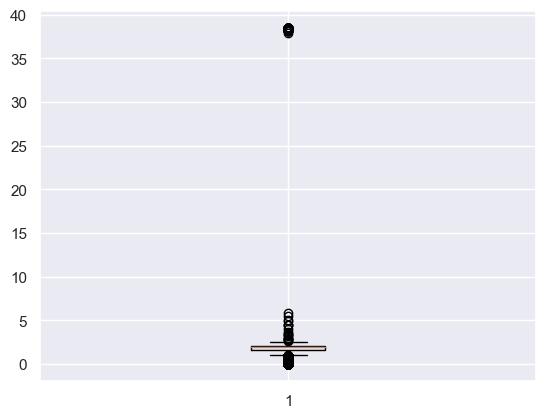

In [10]:
plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])

In [11]:
outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=False, returnVals=True)
outliers

,speed
trackId,
986,38.423926
991,38.412151
996,38.422889
1001,38.425139
1006,38.426095
...,...
1981,38.421573
1986,38.422226
1991,38.425003


In [12]:
outliers = cleaner.getOutliersByYDisplacement(pedDf, byIQR=False, returnVals=True)
outliers

using min Y displacement (3)


,displacementY
trackId,
2006,0.011665


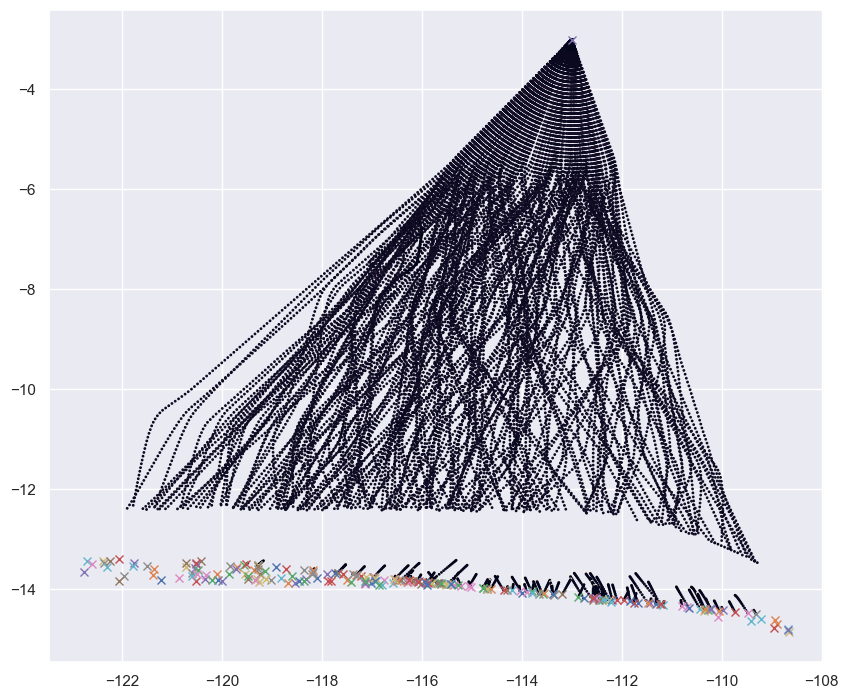

In [15]:

visualizer.show(pedDf, idCol = 'trackId', xCol = 'mapX', yCol = 'mapY', colorCol='speed')

In [ ]:
pedDf["trackId"].unique()

In [ ]:
base = pyplot.gca().transData
rot = transforms.Affine2D().rotate_deg(90)